In [2]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

TM6_glial_ECM_help (generic function with 1 method)

In [3]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [4]:
function TM(u, p, t)
    U(y) = p[8] + p[9] / ( 1.0 + exp( -50.0 * (y - p[7]) ) )
    σ(x) = 1.0 / ( 1.0 + exp( -20.0 * (x-p[6]) ) )
    du1 = (-u[1] + p[1] * log( 1.0 + exp( (p[5] * U(u[3]) * u[2] * u[1] + p[11]  ) / (p[1]) ) ) ) / p[2]
    du2 = (1.0 - u[2])/p[3] - U(u[3])*u[2]*u[1]
    du3 = (-u[3])/p[4] + p[10] * σ(u[2])
    return SA[du1, du2, du3]
end

TM (generic function with 1 method)

In [5]:
t = 500.0; tt = 250.0; tstep = 0.001
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [6]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58;  const U0 = 0.35;  const ΔU0 = 0.305;

In [7]:
I0 = -1.4;

In [8]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = SA[20.455045022701544, 0.6593363650670052, 0.4460452247536085]

3-element SVector{3, Float64} with indices SOneTo(3):
 20.455045022701544
  0.6593363650670052
  0.4460452247536085

In [9]:
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.35, 0.305, 0.3, -1.4]
 time:          0.0
 state:         [20.455045022701544, 0.6593363650670052, 0.4460452247536085]


In [10]:
lb_size = 35; tck_size = 30;

In [11]:
tr, trange = trajectory(ds, t, Δt = tstep; Ttr = tt)

(3-dimensional StateSpaceSet{Float64} with 500001 points, 250.0:0.001:750.0)

In [15]:
ts, tf = 1, 10000

(1, 10000)

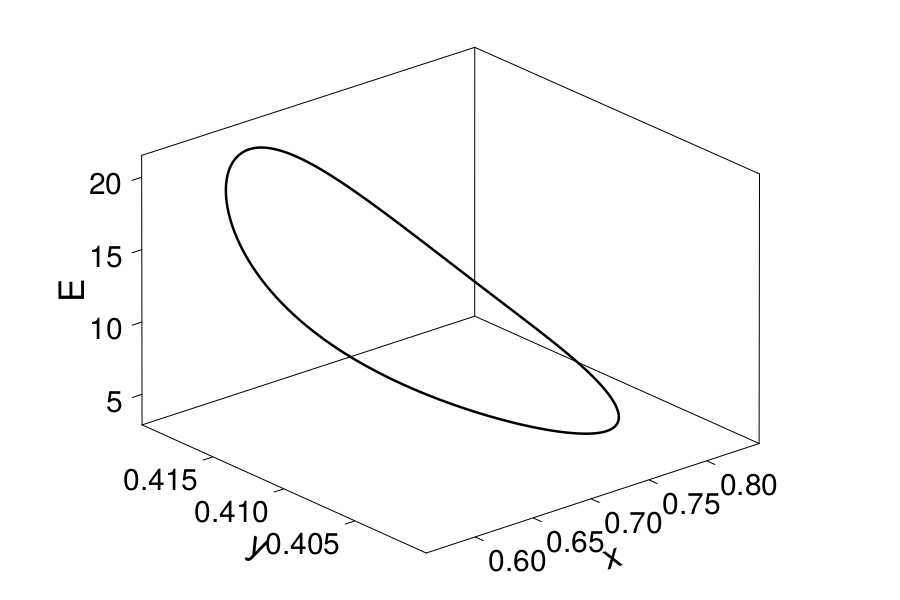

CairoMakie.Screen{IMAGE}


In [22]:
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)
lines!(axis3, tr[ts:tf, 2], tr[ts:tf, 3], tr[ts:tf, 1], linewidth = 2.5, color = :black)
ylims!(0.4, 0.42)
display(f)

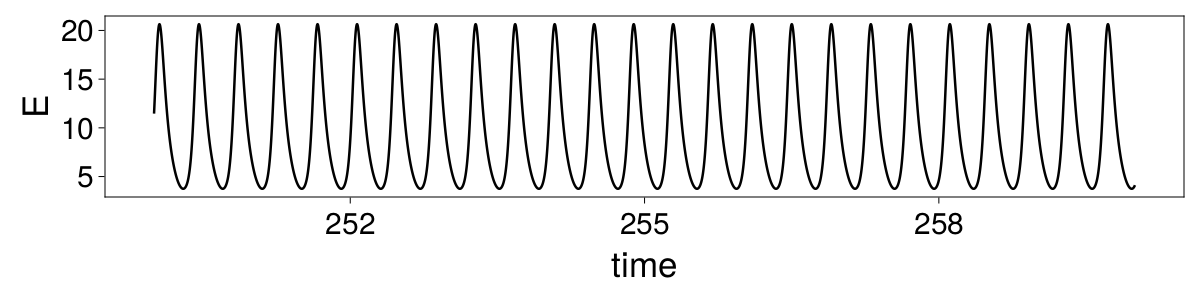

CairoMakie.Screen{IMAGE}


In [17]:
ts, tf = 1, 10000
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, trange[ts:tf], tr[ts:tf, 1], linewidth = 2.5, color = :black)
display(f)

In [18]:
save("timeseries_spike_3th.eps", f)

CairoMakie.Screen{EPS}
